<a href="https://colab.research.google.com/github/AnahitShekikyan/ADS-505-Final-Team-Project/blob/main/ADS505_Final_Project_Group_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Project**

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

GitHub Repository Link: https://github.com/AnahitShekikyan/ADS-505-Final-Team-Project

## **Business Problem**
The objective of this project is to identify fraudulent credit card transactions. Credit card fraud detection is critical for financial institutions, as it helps prevent financial loss and maintain customer trust. We aim to build a model that can accurately detect fraudulent transactions, which account for only 0.17% of all transactions in our dataset.

## **Dataset Information**
The dataset contains 284,807 transactions, with 31 features describing each transaction. The target variable indicates whether the transaction is fraudulent (1) or legitimate (0). Given the class imbalance, specific techniques will be applied to address this challenge.
    

In [ ]:
%%capture
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

# **Import Data & Libraries**

In [ ]:
%%capture
!pip install dmba

#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from dmba import classificationSummary
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Path to the dataset in Google Drive
data = '/content/drive/MyDrive/creditcard.csv'

# Load the CSV into a pandas DataFrame
df = pd.read_csv(data)

# Display the first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Basic Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking if there are there duplicates?
df.duplicated().sum()

1081

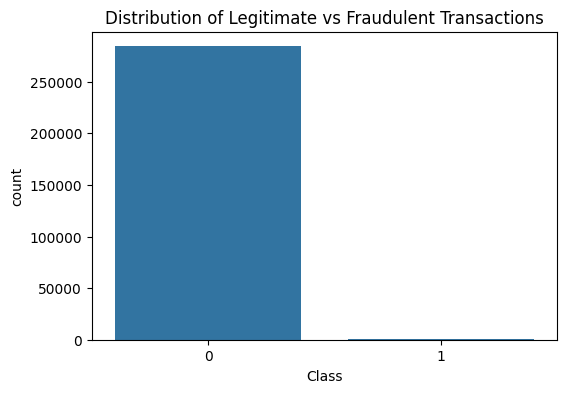

,count
Class,
0,284315
1,492


In [ ]:
# Plotting the class distribution to visualize the class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Legitimate vs Fraudulent Transactions')
plt.show()

# Cheking if there is there class imbalance?
df['Class'].value_counts()

The histogram further confirms the extreme imbalance in the dataset with very few fraudulent instances compared to the legitimate ones. We need to handle the class imbalance and do dditional exploratory data analysis focusing on the minority class (fraud) to extract more relevant insights or patterns specific to those cases.


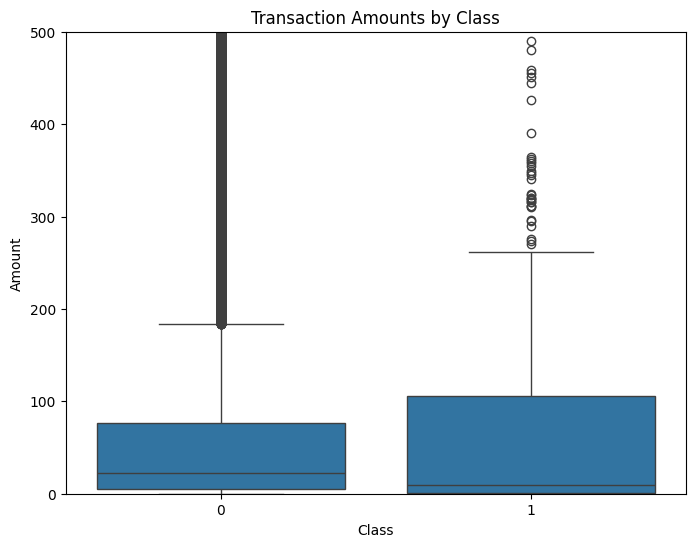

In [ ]:
# Plotting the transaction amounts for fraud vs non-fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)

# Limiting y-axis to focus on smaller amounts for clearer visualization
plt.ylim(0, 500)
plt.title('Transaction Amounts by Class')
plt.show()

This box plot indicates that fraudulent transactions (Class 1) have higher median transaction amounts compared to legitimate transactions (Class 0). However, both classes show a wide range of transaction amounts, and there are more outliers in the legitimate transactions, so we need to use the "Amount" feature as a predictor since there appears to be a noticeable difference between classes. Investigate the outliers in the legitimate transactions to determine if they might be misclassified frauds or anomalies that need special handling, and normalize or standardize the "Amount" variable since it may vary significantly and could influence model performance if left unscaled.

# **Data Quality Report**


In [ ]:
# Summary stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
def data_quality_report(df):

    # Initializing the report dictionary
    report = pd.DataFrame(index=df.columns)

    # Data types
    report['Data Type'] = df.dtypes

    # Counting missing values
    report['Missing Values'] = df.isnull().sum()

    # Counting percentage of missing values
    report['% Missing'] = (df.isnull().sum() / len(df)) * 100

    # Counting of unique values
    report['Unique Values'] = df.nunique()

    # Continuous features summary (only for float64 and int64)
    report['Min'] = df.min()
    report['Max'] = df.max()
    report['Mean'] = df.mean()
    report['Median'] = df.median()
    report['Standard Deviation'] = df.std()

    # Checking for duplicates
    report['Duplicates'] = df.duplicated().sum()

    # Determine cardinality for categorical variables (assumes non-continuous variables)
    report['Cardinality'] = [df[col].nunique() if df[col].dtype == 'object' else 'N/A' for col in df.columns]

    # Return the report
    return report

# Generating the Data Quality Report for the dataset
report = data_quality_report(df)

# Display the report
report

,Data Type,Missing Values,% Missing,Unique Values,Min,Max,Mean,Median,Standard Deviation,Duplicates,Cardinality
Time,float64,0,0.0,124592,0.000000,172792.000000,9.481386e+04,84692.000000,47488.145955,1081,N/A
V1,float64,0,0.0,275663,-56.407510,2.454930,1.168375e-15,0.018109,1.958696,1081,N/A
V2,float64,0,0.0,275663,-72.715728,22.057729,3.416908e-16,0.065486,1.651309,1081,N/A
V3,float64,0,0.0,275663,-48.325589,9.382558,-1.379537e-15,0.179846,1.516255,1081,N/A
V4,float64,0,0.0,275663,-5.683171,16.875344,2.074095e-15,-0.019847,1.415869,1081,N/A
V5,float64,0,0.0,275663,-113.743307,34.801666,9.604066e-16,-0.054336,1.380247,1081,N/A
V6,float64,0,0.0,275663,-26.160506,73.301626,1.487313e-15,-0.274187,1.332271,1081,N/A
V7,float64,0,0.0,275663,-43.557242,120.589494,-5.556467e-16,0.040103,1.237094,1081,N/A
V8,float64,0,0.0,275663,-73.216718,20.007208,1.213481e-16,0.022358,1.194353,1081,N/A
V9,float64,0,0.0,275663,-13.434066,15.594995,-2.406331e-15,-0.051429,1.098632,1081,N/A


Here is a detailed summary of each feature in the dataset, covering various statistical and descriptive properties that are crucial for data exploration and preparation.


*   **Data Type:** All features, except the target variable (Class), are continuous and represented as floats.

*   **Missing Values:** There are no missing values, which indicates the dataset is complete and requires no imputation.


*   **Unique Values:** The number of distinct values in each feature. High cardinality (e.g., for Time and most other features) indicates a diverse set of values, typical for continuous variables.


*   **Min/Max:** It provides insight into the range of each feature. For example, the feature Amount ranges from 0 to 25691.16, which is consistent with transaction values.

*   **Mean/Median:**  This show that most features have means close to zero. This suggests that the features might have been transformed (e.g., PCA) to center their distributions.


*   **Standard Deviation:** It show the spread or dispersion of values within each feature. Features like "Amount" have a high standard deviation (250.12), reflecting a wide range of transaction values.

*   **Duplicates:** There are 1081 duplicate rows in the dataset, which may need to be removed or might prevent bias in model training.


*   **Cardinality:** Not applicable for continuous features.

Based on the data quality report we need to remove duplicates, handle outliers, scale the data, and  reduce multicollinearity.

# **Univariate Analysis**

**For Continuous Features**

Summary statistics for continuous features:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  

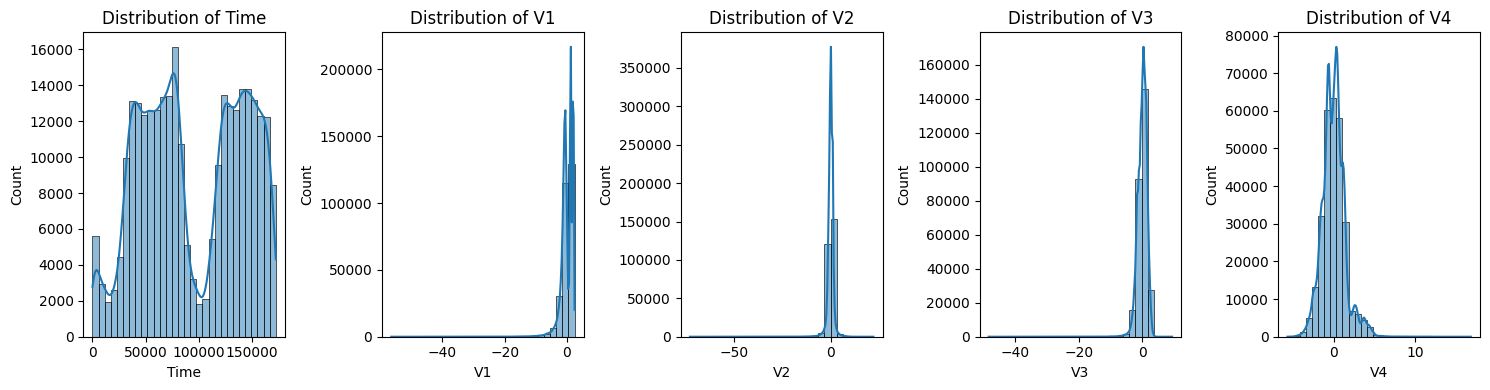

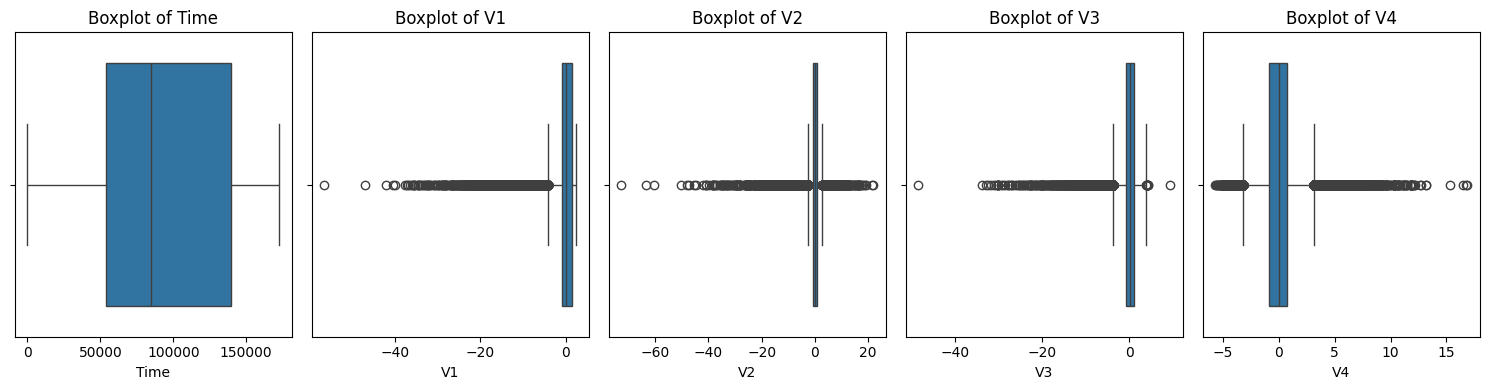

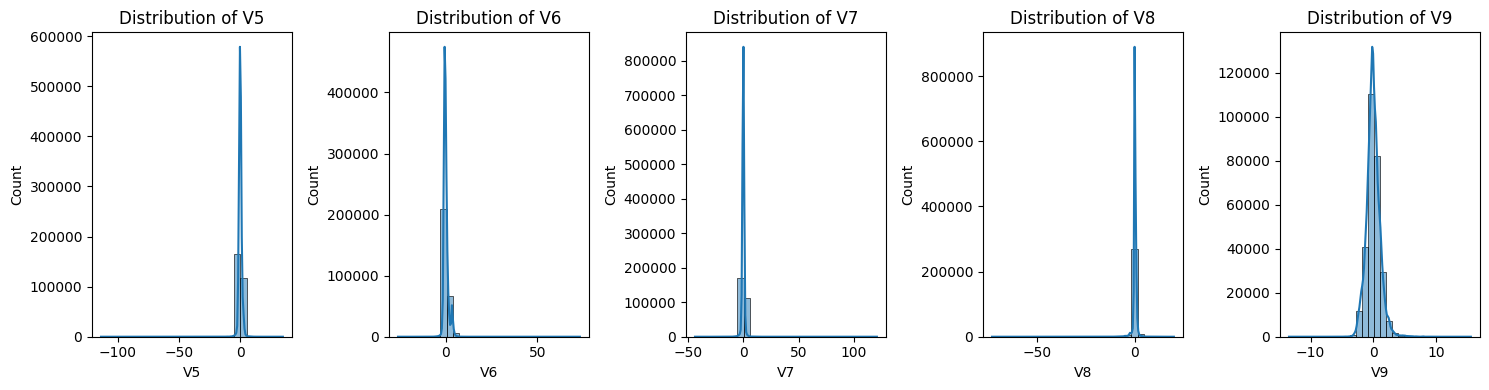

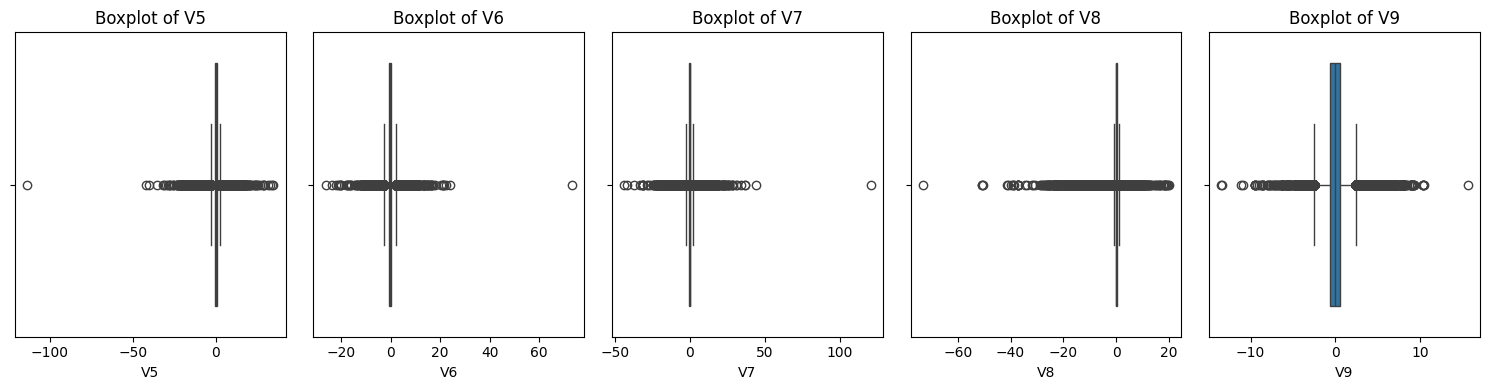

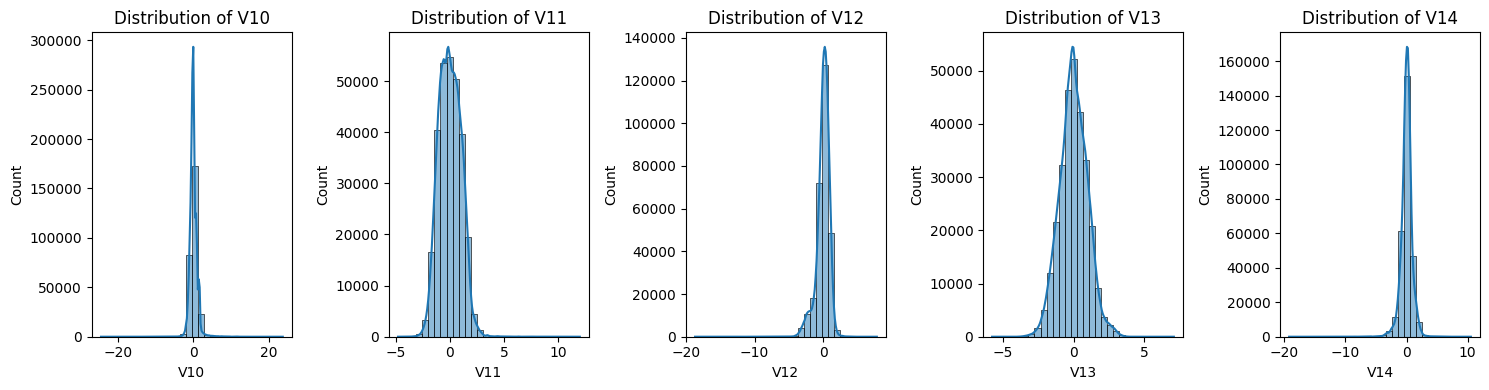

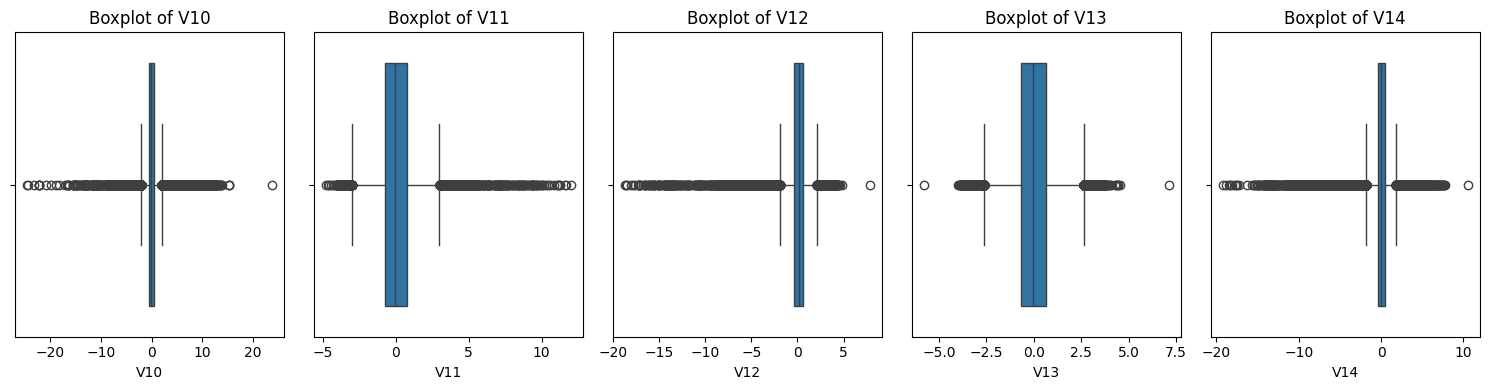

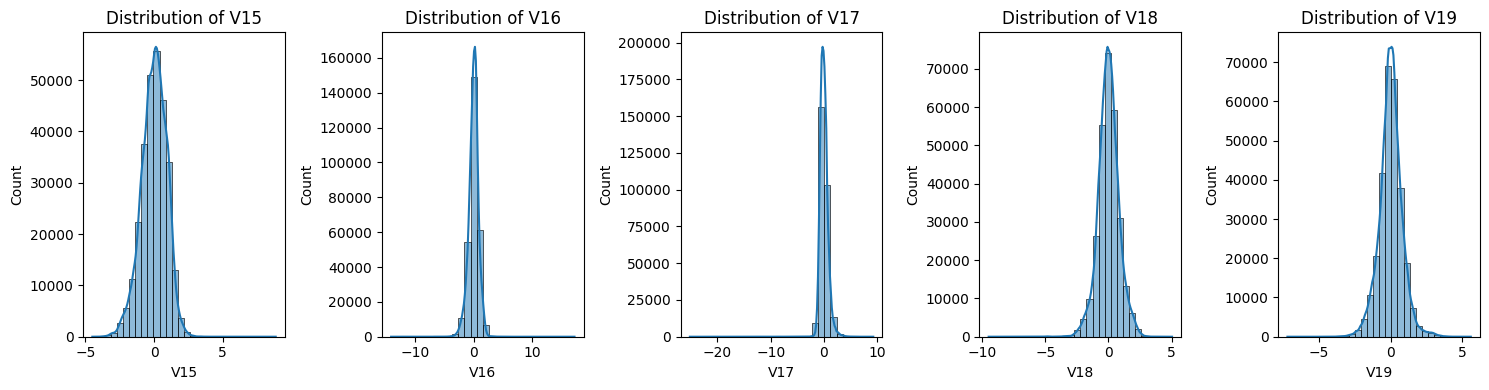

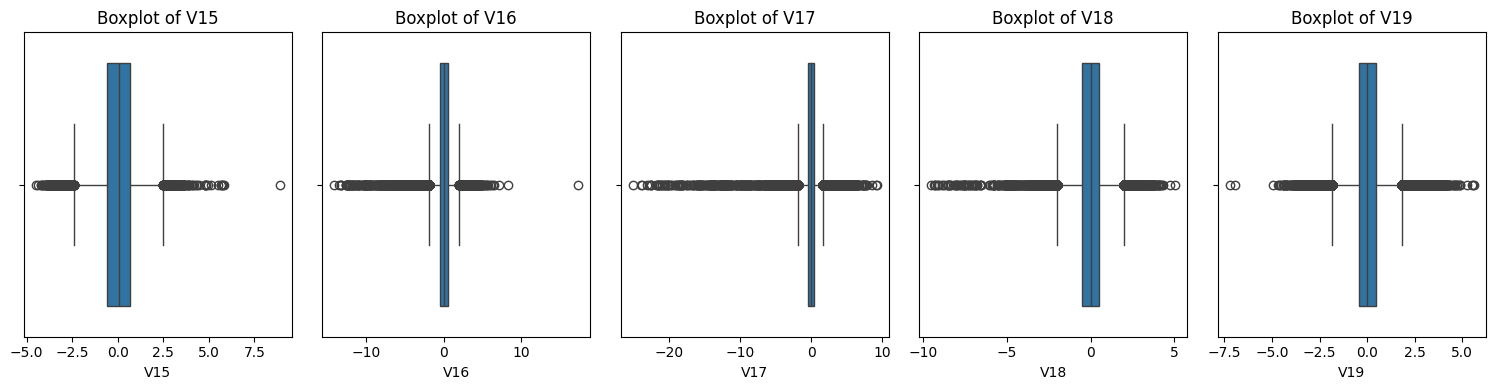

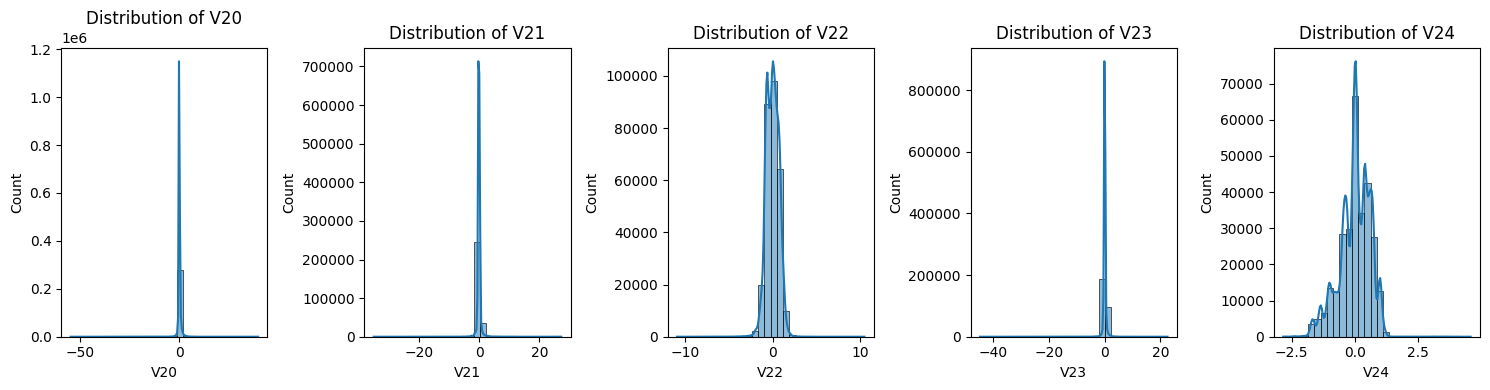

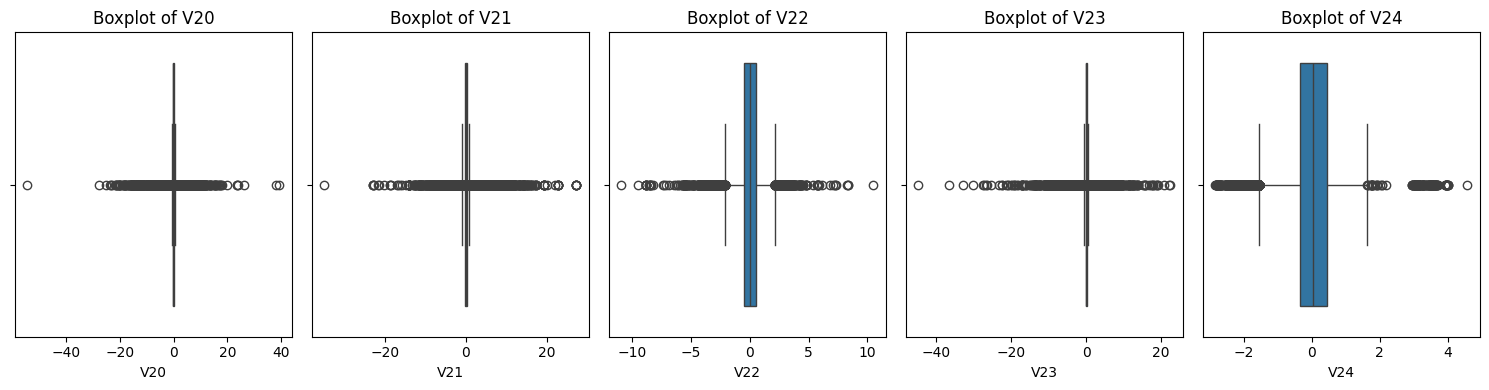

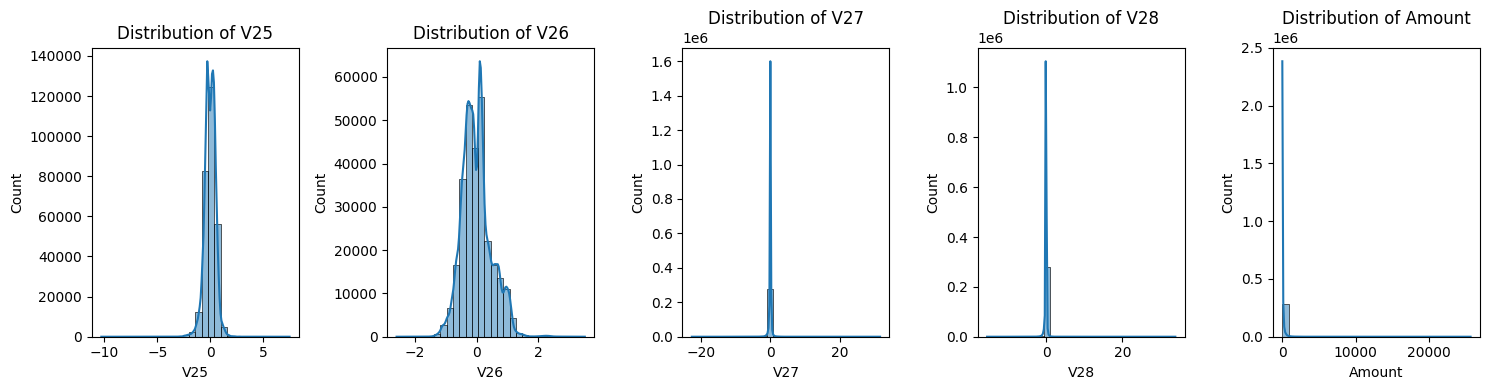

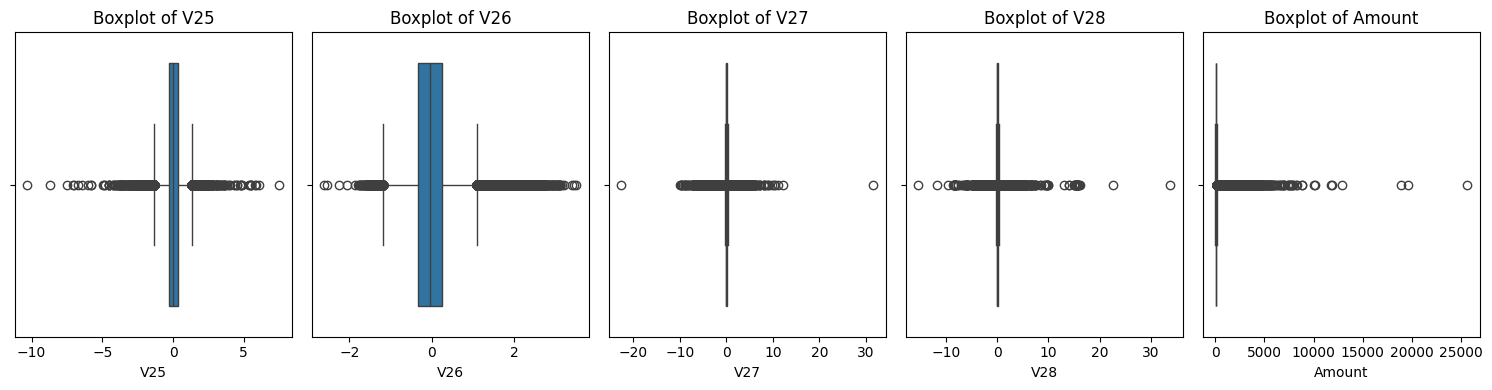

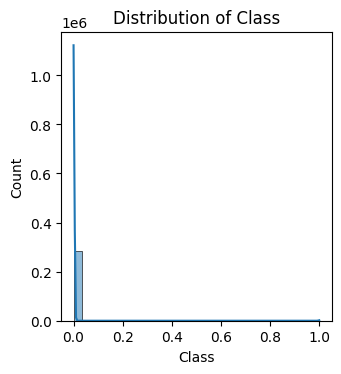

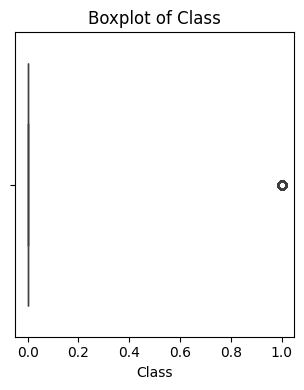

In [ ]:
# Generating summary statistics for continuous variables
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Summary statistics for continuous features:")
print(df[continuous_features].describe())

# Visualizing continuous variables in sets of 5 per row
n_features = len(continuous_features)
n_cols = 5  # Number of plots per row

for i in range(0, n_features, n_cols):
    plt.figure(figsize=(15, 4))  # Adjust the width for 3 plots per row
    for j in range(n_cols):
        if i + j < n_features:
            feature = continuous_features[i + j]

            # Create subplot for histogram and boxplot
            plt.subplot(1, n_cols, j + 1)
            sns.histplot(df[feature], bins=30, kde=True)
            plt.title(f'Distribution of {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Second row with boxplots for the same features
    plt.figure(figsize=(15, 4))  # Separate figure for boxplots
    for j in range(n_cols):
        if i + j < n_features:
            feature = continuous_features[i + j]

            # Create subplot for boxplot
            plt.subplot(1, n_cols, j + 1)
            sns.boxplot(x=df[feature])
            plt.title(f'Boxplot of {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

There is a histograms and boxplots for each continuous feature to explore their distributions.

Histograms show the distribution of data within each feature. It helps identify skewness, modality (e.g., unimodal, bimodal), and if the data follows a normal distribution. For an example features like V1, V2, and others often show normal-like distributions centered around zero. This indicates they may have been scaled or transformed.

Boxplots display the spread and presence of outliers for each feature, and gave a view of the median, quartiles, and extreme values. For an exzamle of boxplots of features like V5, V6, etc., reveal many outliers, which can be important when deciding on preprocessing techniques, like applying robust scaling or addressing extreme values to avoid undue influence on the models.

Both histograms and boxplots are displayed side by side for each set of features, ensuring that the visual exploration of the dataset is comprehensive.

**For Categorical Features**

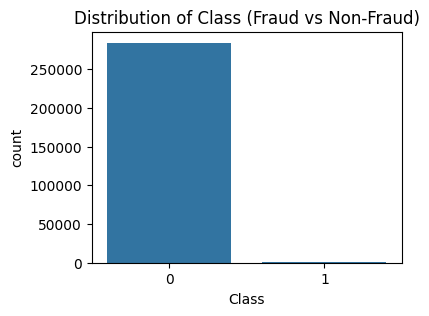

Percentage distribution of the target variable 'Class':
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [ ]:
# Visualizing the target variable 'Class'
plt.figure(figsize=(4, 3))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class (Fraud vs Non-Fraud)')
plt.show()

# Display percentage of fraud vs non-fraud transactions
class_counts = df['Class'].value_counts(normalize=True) * 100
print("Percentage distribution of the target variable 'Class':")
print(class_counts)

The bar chart displays the distribution of the target variable, Class, which represents legitimate transactions (Class 0) and fraudulent transactions (Class 1). It shows a significant imbalance between the two classes, with legitimate transactions making up 99.83% of the dataset, while fraudulent transactions only constitute 0.17%.

The extreme class imbalance indicated by the chart requires special consideration in the modeling process to ensure the model's effectiveness in identifying the minority class (fraudulent transactions). Proper resampling, algorithm adjustments, and appropriate evaluation metrics will be crucial to developing an effective fraud detection model.


# **Multivariate Analysis**

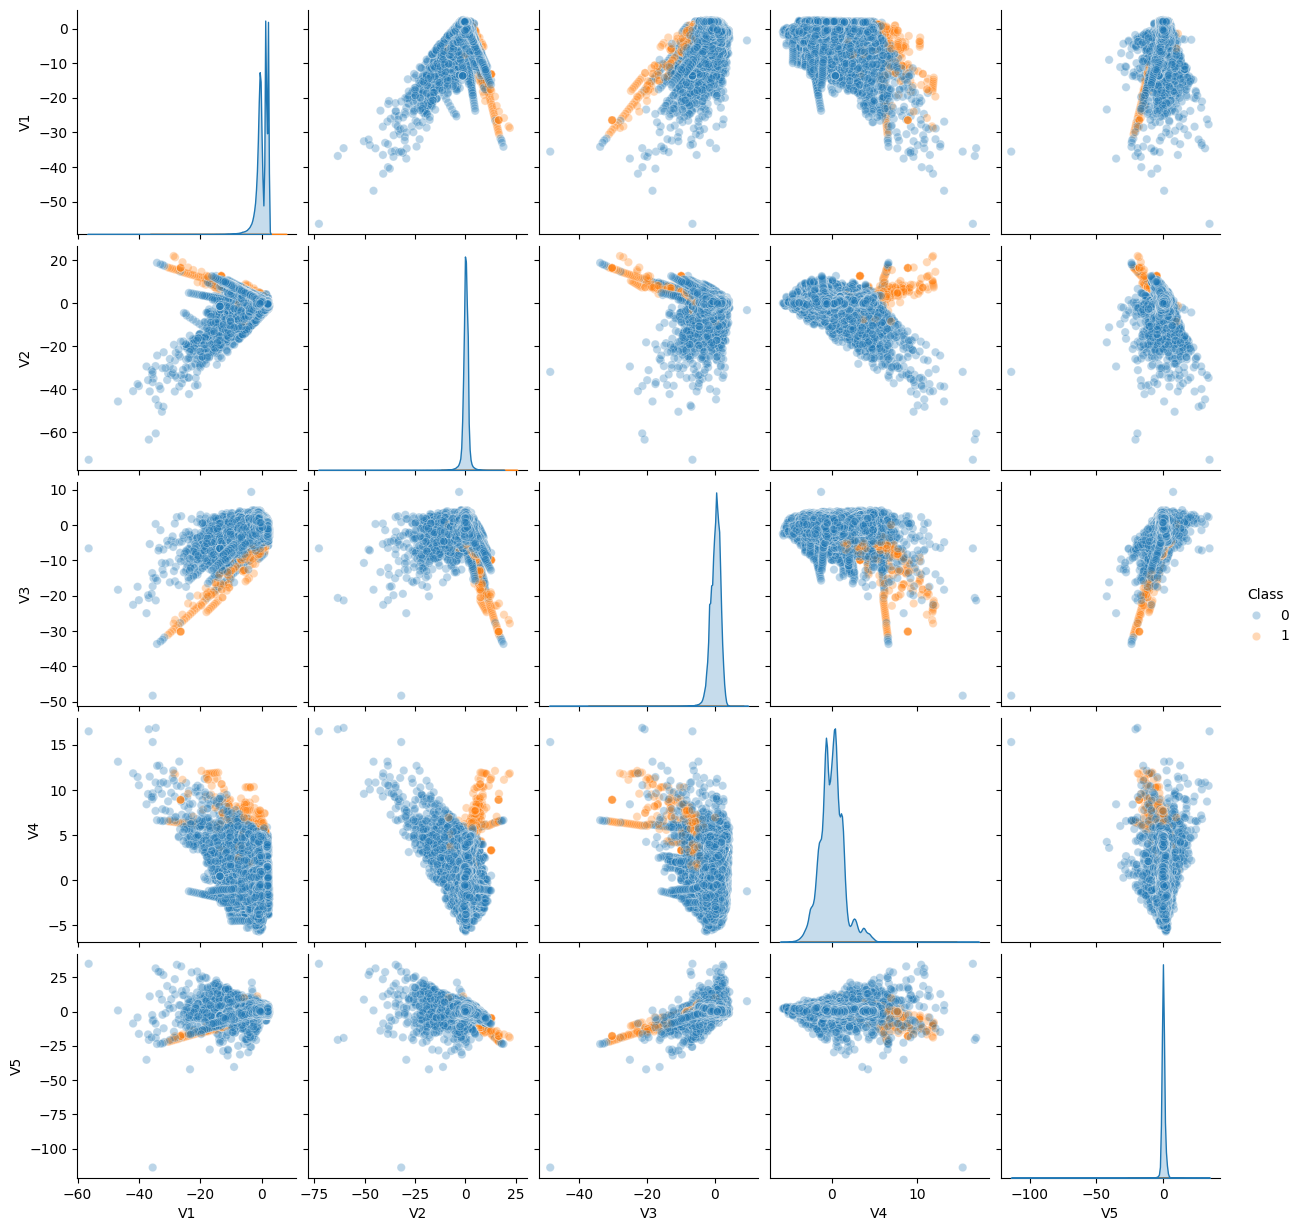

In [ ]:
# Using a subset of features to avoid too many plots (e.g., V1 to V5)
subset_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Class']

# Creating a pair plot
sns.pairplot(df[subset_features], hue='Class', diag_kind='kde', plot_kws={'alpha': 0.3})
plt.show()

The pair plot shows the relationships and scatter distributions of selected features (e.g., V1, V2, etc.) across different classes. There are clusters and some separable patterns, particularly between legitimate and fraudulent classes. Here we need to identify and prioritize features that show clear separability between classes as important predictors for modeling.

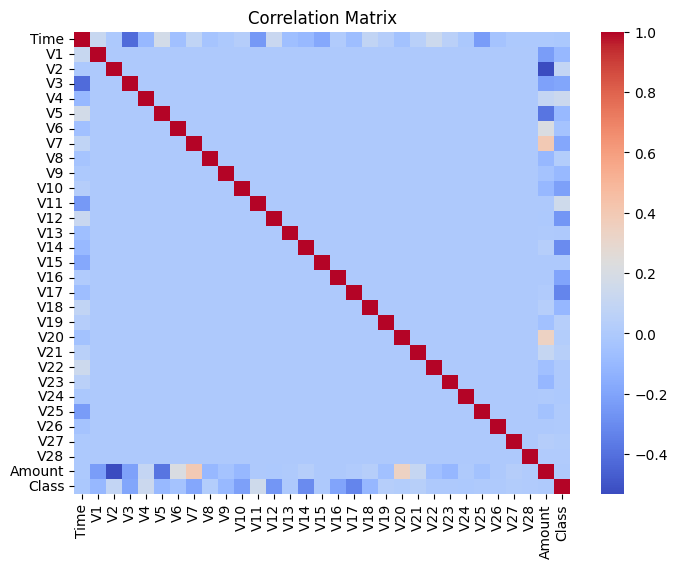

In [ ]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Ploting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This heatmap illustrates the correlation between different features. Some features show strong correlations, which could indicate redundancy or multicollinearity issues. Here are the steps we might go for the next steps:


*   Removing or combine highly correlated features to avoid multicollinearity in model building (e.g., using PCA or dropping one of the correlated features).

*   Focusing on features with stronger correlations with the target variable (Class) as they might be more predictive.

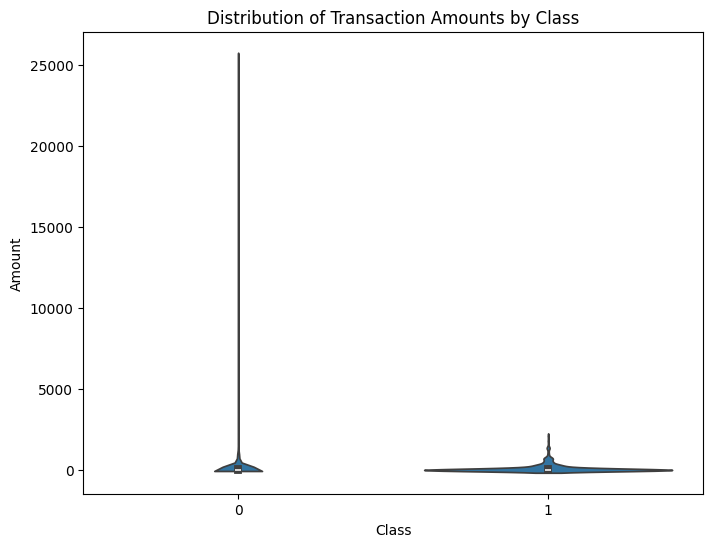

In [ ]:
# Violin plot for 'Amount' based on 'Class'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

The violin plot gives a deeper look into the distribution and density of transaction amounts by class. It shows that fraudulent transactions have a more concentrated distribution compared to legitimate ones, which are more spread out with outliers. Here we can explore additional features that might help differentiate frauds based on amount distributions, also handling outliers in the legitimate transactions to refine model performance.

In [ ]:
# Only keeping numeric features (skip target 'Class')
X = df.drop(columns=['Class'])

# Calculating VIF (Variance Inflation Factor) for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Feature        VIF
0     Time   2.339084
1       V1   1.621694
2       V2   3.869377
3       V3   1.255585
4       V4   1.137944
5       V5   2.753075
6       V6   1.522122
7       V7   2.510165
8       V8   1.097151
9       V9   1.018831
10     V10   1.115668
11     V11   1.028861
12     V12   1.011961
13     V13   1.003434
14     V14   1.026832
15     V15   1.014135
16     V16   1.000371
17     V17   1.004772
18     V18   1.006568
19     V19   1.037809
20     V20   2.233934
21     V21   1.100720
22     V22   1.082384
23     V23   1.149268
24     V24   1.000659
25     V25   1.013388
26     V26   1.000487
27     V27   1.008979
28     V28   1.001425
29  Amount  11.499791


The VIF output indicates the level of multicollinearity among the features in dataset.

Most features (e.g., "V1", "V3", "V6", "V8", and others) have VIF values close to 1, indicating very low multicollinearity. This suggests that these features are not significantly correlated with other features in the dataset, making them reliable for use in regression models.

Features like "V2", "V5", "V7", and "V20" have VIF values between 2 and 4. These values are still within an acceptable range but indicate some degree of correlation with other features. While these values do not warrant immediate removal, it's important to monitor these features in case they lead to multicollinearity issues in your model.

The "Amount" feature has a VIF value of approximately 11.5, which is quite high and indicates significant multicollinearity. This suggests that "Amount" may be highly correlated with one or more other features in the dataset. High VIF values like this could distort regression coefficients and affect the stability and interpretability of the model.

Since Amount has a high VIF value, you might need to explore its correlation with other features. If it's highly correlated with other variables, we can removing it, if it doesn't contribute new information or combine it with other features or transform it to reduce the correlation.

Although the VIF values between 2 and 4 are acceptable, it's a good idea to keep these features in mind when evaluating model performance, as they might introduce minor multicollinearity.

In [ ]:
# Group by 'Class' and compute summary statistics for continuous features
grouped_stats = df.groupby('Class').mean()
print(grouped_stats)

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

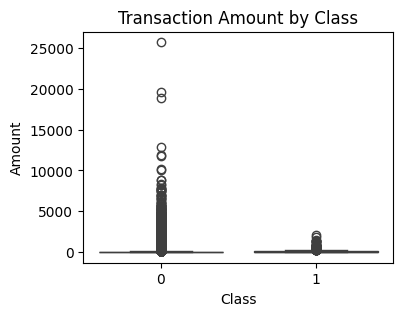

In [ ]:
# Box plot of Amount grouped by Class
plt.figure(figsize=(4, 3))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

This boxplot visualizes the distribution of transaction amounts for legitimate (Class 0) and fraudulent (Class 1) transactions. Fegitimate transactions (Class 0), the majority of transaction amounts are concentrated at lower values, with a few extreme outliers reaching up to over 25,000 and but  presence of numerous outliers suggests that legitimate transactions vary widely in amount, with most being small but some being very large.

For fraudlent transactions (Class 1) show low fraudulent transaction but appear to be more tightly distributed, with significantly fewer extreme outliers compared to legitimate transactions. Which suggests that fraudulent transactions generally tend to have lower amounts, and there is less variation in their values.

Our dataset contains substantial outliers, which is common in fraud detection, so RobustScaler is primary choice, because this scaler centers the data using the median and scales using the interquartile range (IQR), which makes it robust to outliers. So, to ensure that outliers are minimized first we will later use  RobustScaler and then further normalize the data for algorithms sensitive to scaling StandardScaler.




# **Data Preprocessing**
In this section, we will handle missing values, scale the data, and address class imbalance.

In [ ]:
# Removing duplicates
df = df.drop_duplicates()

In [ ]:
# Checking if there are there still any duplicates?
df.duplicated().sum()

0

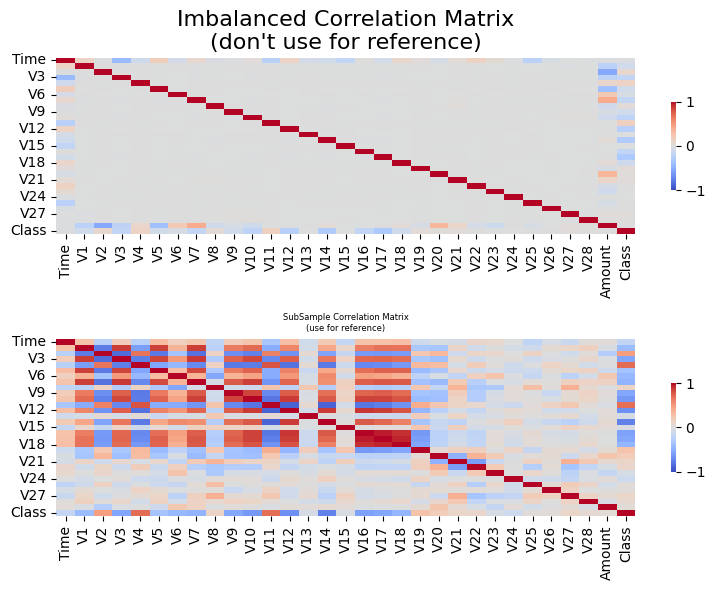

In [ ]:
# Creating a correlation matrix with imbalanced and SubSample data
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

# Concatenate fraud and non-fraud samples to create a balanced subsample
subsample = pd.concat([fraud, non_fraud])

# Compute correlation matrices
corr_matrix_full = df.corr()
corr_matrix_subsample = subsample.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Imbalanced correlation matrix
sns.heatmap(corr_matrix_full, cmap='coolwarm', ax=ax[0], cbar_kws={'shrink': 0.5}, vmin=-1, vmax=1)
ax[0].set_title('Imbalanced Correlation Matrix\n(don\'t use for reference)', fontsize=16)

# Subsample correlation matrix
sns.heatmap(corr_matrix_subsample, cmap='coolwarm', ax=ax[1], cbar_kws={'shrink': 0.5}, vmin=-1, vmax=1)
ax[1].set_title('SubSample Correlation Matrix\n(use for reference)', fontsize=6)

plt.tight_layout()
plt.show()

The two correlation matrices illustrate the relationship between different features in the dataset, showing how preprocessing, especially subsampling, impacts the representation and correlations between features.

Imbalanced correlation matrix show the  lacks variability and detail, indicating that the class imbalance masks true relationships between features. This is because the overwhelming majority of non-fraudulent (Class 0) data points dominate the calculation, making the correlation values less reliable for model development. This matrix is not ok to  be used as a reference for feature selection or understanding relationships since it is skewed by the imbalance.

SubSample correlation matrix shows a more diverse pattern of correlations, with a mixture of positive and negative correlations across different feature pairs. This suggests that the subsampled dataset is better balanced, allowing the true relationships to surface. There is a
strong correlations between some features (e.g., between V3, V6, and V9) which could indicate multicollinearity.



# **Supervised Algorithm**


## Model 1 _ Logistic Regression

In [ ]:
#  Re assigning X after removing duplicates from df
X = df.drop(columns=['Class'])

# Applying RobustScaler first
# Will be using X which was defined earlier section
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

# Applying StandardScaler on the robust-scaled data
standard_scaler = StandardScaler()
X_final_scaled = standard_scaler.fit_transform(X_robust_scaled)

In [ ]:
# Here we are setting 'y' as the target variable, df is the original dataset
y = df['Class']

# Spliting the dataset into training and testing sets using X_final_scaled that was created earlier
# Here we will be using stratify during train test split due to the imbalanced nature of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Initializing the logistic regression model, adjusting max_iter if necessary for convergence
# Here we are applying class_weight as balanced to automatically assigns weights inversely proportional to the class frequencies in the data
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Training the model using the training data
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = log_reg.predict(X_test)
y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluating the model
# We will be skipping the accuracy since in imbalanced dataset, it may not be meaningful
# Instead, we will focus more on Precision, Recall, and AUPRC
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

# Calculating AUPRC
auprc_lr = auc(recall_lr, precision_lr)

# Displaying the evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", report_lr)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc_lr:.2f}")


Confusion Matrix:
 [[55263  1388]
 [   12    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Area Under the Precision-Recall Curve (AUPRC): 0.70


## Model 2 _ Random Forest Classifier

In [ ]:
# Initialize RandomForestClassifier with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluating the model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Calculating AUPRC
auprc_rf = auc(recall_rf, precision_rf)

# Displaying the evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", report_rf)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc_rf:.2f}")


Confusion Matrix:
 [[56649     2]
 [   28    67]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Area Under the Precision-Recall Curve (AUPRC): 0.80


#**Unsupervised Algorithm**

##Model 3 _ Isolation Forest

In [ ]:
# Initialize the Isolation Forest model
# Here we use a high contamination of 0.05 to try catch more fraud transactions
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model using the X_final_scaled from before
isolation_forest.fit(X_final_scaled)

# Predict anomalies using the Isolation Forest model
# The predict method returns -1 for anomalies and 1 for normal data
y_pred_if = isolation_forest.predict(X_final_scaled)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
y_pred_converted_if = [1 if x == -1 else 0 for x in y_pred_if]

# Evaluating the model
conf_matrix_if = confusion_matrix(y, y_pred_converted_if)
report_if = classification_report(y, y_pred_converted_if)

# Step 1: Get anomaly scores from the Isolation Forest model
# The decision_function method provides the anomaly scores (higher score indicates a normal point, lower score indicates an outlier)
anomaly_scores = isolation_forest.decision_function(X_final_scaled)

# Step 2: Calculate precision, recall, and thresholds using precision_recall_curve
# Use negative scores to match with anomaly prediction
precision_if, recall_if, thresholds = precision_recall_curve(y, -anomaly_scores)

# Step 3: Calculate the AUPRC
auprc_if = auc(recall_if, precision_if)

# Displaying the evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix_if)
print("\nClassification Report:\n", report_if)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc_if:.2f}")


Confusion Matrix:
 [[269463  13790]
 [    76    397]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    283253
           1       0.03      0.84      0.05       473

    accuracy                           0.95    283726
   macro avg       0.51      0.90      0.51    283726
weighted avg       1.00      0.95      0.97    283726

Area Under the Precision-Recall Curve (AUPRC): 0.09


##Model 4 _ DBSCAN

In [ ]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune these hyperparameters

# Here we would fit and predict directly
y_preds_dbscan = dbscan.fit_predict(X_final_scaled)

# Convert -1 (anomalies) to 1 (fraud) and others to 0 (non-fraud)
y_preds_convert_dbscan = [1 if x == -1 else 0 for x in y_preds_dbscan]

# Evaluating the model
conf_matrix_dbscan = confusion_matrix(y, y_preds_convert_dbscan)
report_dbscan = classification_report(y, y_preds_convert_dbscan)

# Calculate precision, recall, and thresholds using precision_recall_curve
precision_dbscan, recall_dbscan, thresholds_dbscan = precision_recall_curve(y, y_preds_convert_dbscan)

# Calculate the AUPRC
auprc_dbscan = auc(recall_dbscan, precision_dbscan)

print("\nConfusion Matrix:\n", conf_matrix_dbscan)
print("\nClassification Report:\n", report_dbscan)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc_dbscan:.2f}")


Confusion Matrix:
 [[ 66088 217165]
 [     3    470]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.38    283253
           1       0.00      0.99      0.00       473

    accuracy                           0.23    283726
   macro avg       0.50      0.61      0.19    283726
weighted avg       1.00      0.23      0.38    283726

Area Under the Precision-Recall Curve (AUPRC): 0.50


#Area Under the Precision-Recall Curve for All The Models

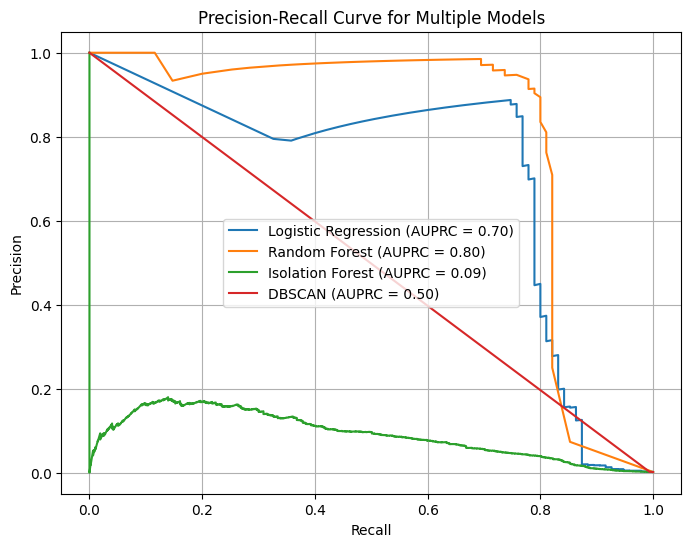

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting Precision-Recall Curve for Logistic Regression
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUPRC = {auprc_lr:.2f})')

# Plotting Precision-Recall Curve for Random Forest
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUPRC = {auprc_rf:.2f})')

# Plotting Precision-Recall Curve for Isolation Forest
plt.plot(recall_if, precision_if, label=f'Isolation Forest (AUPRC = {auprc_if:.2f})')

# Plotting Precision-Recall Curve for DBSCAN
plt.plot(recall_dbscan, precision_dbscan, label=f'DBSCAN (AUPRC = {auprc_dbscan:.2f})')

# Adding labels, title, legend, and grid
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models')
plt.legend()
plt.grid()

# Show plot
plt.show()

#Evaluating The Models

In [ ]:
# Initializing an empty list to store results
results = []

models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Isolation Forest': y_pred_converted_if,
    'DBSCAN': y_preds_convert_dbscan
}

# Training and evaluating each model
for model_name, model in models.items():

    # Calculating metrics
    if (model_name == 'Logistic Regression') or (model_name == 'Random Forest'):
      precision = precision_score(y_test, model)
      recall = recall_score(y_test, model)
    else:
      precision = precision_score(y, model)
      recall = recall_score(y, model)

    # Append results to the list
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall
    })

# Converting results to DataFrame
df_results = pd.DataFrame(results)

# Displaying the results
display(df_results)

,Model,Precision,Recall
0,Logistic Regression,0.056424,0.873684
1,Random Forest,0.971014,0.705263
2,Isolation Forest,0.027983,0.839323
3,DBSCAN,0.002160,0.993658


#**Conclusion**


**Logistic Regression (AUPRC = 0.70):** This model performs moderately, with an AUPRC (Area Under Precision-Recall Curve) of 70%. However, it has a very bad precision. This is understandable due to the nature of the imbalanced dataset. This is very optimal, however, we have to be aware that the dataset has been stratified during train test split and have a smaller overall dataset.

**Random Forest (AUPRC = 0.80):** The Random Forest model achieves a very good AUC of 80%, which indicates good separation between classes. The AUPRC curve follows the axes precisely, meaning it correctly identifies most of the true positives and negatives without any error. Surprisingly, it also has a very good precision and a decent recall. This is very optimal, however, we have to be aware that the dataset has been stratified during train test split and have a smaller overall dataset.

**Isolation Forest (AUPRC = 0.09):** Isolation Forest is obviously not performing well with a AUPRC of only 9%. This indicates that it is even worse than random guessing of 50/50. Although we are using the entire dataset without stratifying it, it is still performing very poorly

**DBSCAN (AUPRC = 0.50):** The DBSCAN (Density-based spatial clustering of applications with noise) model, with an AUPRC of 50%, indicates that it is only perfoming just as good as random guess. Overall in general, it seems like the unsupervised Algorithm is not performing well.

In [ ]:
%%capture
!jupyter nbconvert --to pdf "/content/drive/MyDrive/ADS505_Final_Project_Group_5.ipynb"